In [248]:
import numpy as np
from numpy import nan
import pandas as pd
import pandas_datareader.data as web
import datetime
from pandas.tseries.offsets import Day, MonthEnd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rc('figure', figsize=(10, 6))
import quandl
quandl.ApiConfig.api_key = "JrZ-rxN7W8dX8z7oG171"
start = datetime.datetime(2013, 2, 28)
end = datetime.datetime(2018, 2, 28) 
aapl = quandl.get("WIKI/AAPL", start_date=start, end_date=end)
intc = quandl.get("WIKI/INTC", start_date=start, end_date=end)
ebay = quandl.get("WIKI/EBAY", start_date=start, end_date=end)
amzn = quandl.get("WIKI/AMZN", start_date=start, end_date=end)
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2013-02-28,444.05,447.8700,441.40,441.400,11518400.0,0.0,1.0,57.908313,58.406477,57.562728,57.562728,80628800.0
2013-03-01,438.00,438.1799,429.98,430.470,19730300.0,0.0,1.0,57.119336,57.142797,56.073452,56.137353,138112100.0
2013-03-04,427.80,428.1999,419.00,420.050,20812700.0,0.0,1.0,55.789160,55.841311,54.641557,54.778487,145688900.0
2013-03-05,421.48,435.1900,420.75,431.144,22801200.0,0.0,1.0,54.964972,56.752886,54.869773,56.225249,159608400.0
2013-03-06,434.51,435.2500,424.43,425.662,16437500.0,0.0,1.0,56.664207,56.760710,55.349680,55.510344,115062500.0


In [233]:
frame = pd.DataFrame({'AAPL':aapl['Adj. Close'],'INTC':intc['Adj. Close'],'EBAY':ebay['Adj. Close'],'AMZN':amzn['Adj. Close']},index=pd.date_range(start,end, freq='BM'))
frame

,AAPL,INTC,EBAY,AMZN
2013-02-28,57.562728,17.865846,21.523802,264.270
2013-03-29,NaN,NaN,NaN,NaN
2013-04-30,57.742693,20.492673,20.611077,253.810
2013-05-31,59.041314,20.970127,21.283819,269.200
2013-06-28,52.056549,20.926943,20.347488,277.690
2013-07-31,59.408242,20.153950,20.335685,301.220
2013-08-30,64.384994,19.169991,19.666878,280.980
2013-09-30,63.001925,19.990690,21.950659,312.640
2013-10-31,69.074425,21.341659,20.736970,364.030
2013-11-29,73.914215,20.986885,19.875388,393.620


In [238]:
frame=frame.interpolate(method='nearest')
frame

,AAPL,INTC,EBAY,AMZN
2013-02-28,57.562728,17.865846,21.523802,264.270
2013-03-29,57.562728,17.865846,21.523802,264.270
2013-04-30,57.742693,20.492673,20.611077,253.810
2013-05-31,59.041314,20.970127,21.283819,269.200
2013-06-28,52.056549,20.926943,20.347488,277.690
2013-07-31,59.408242,20.153950,20.335685,301.220
2013-08-30,64.384994,19.169991,19.666878,280.980
2013-09-30,63.001925,19.990690,21.950659,312.640
2013-10-31,69.074425,21.341659,20.736970,364.030
2013-11-29,73.914215,20.986885,19.875388,393.620


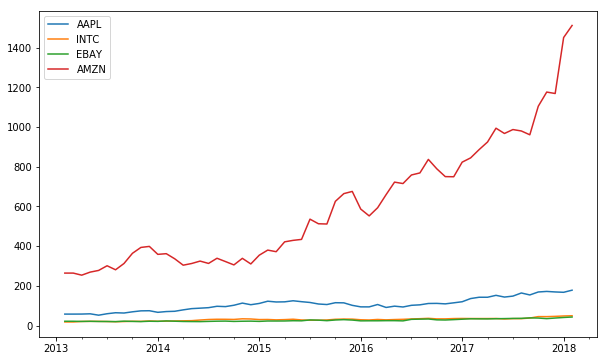

In [239]:
frame.plot()

,AAPL,INTC,EBAY,AMZN
2013-02-28,57.562728,17.865846,21.523802,264.270
2013-03-29,57.562728,17.865846,21.523802,264.270
2013-04-30,57.742693,20.492673,20.611077,253.810
2013-05-31,59.041314,20.970127,21.283819,269.200
2013-06-28,52.056549,20.926943,20.347488,277.690
2013-07-31,59.408242,20.153950,20.335685,301.220
2013-08-30,64.384994,19.169991,19.666878,280.980
2013-09-30,63.001925,19.990690,21.950659,312.640
2013-10-31,69.074425,21.341659,20.736970,364.030
2013-11-29,73.914215,20.986885,19.875388,393.620


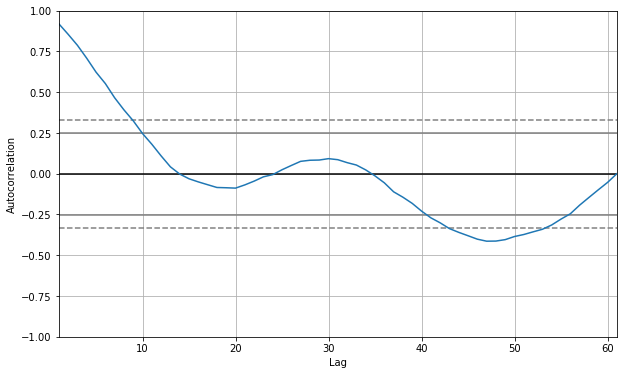

In [116]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(frame['AAPL'])

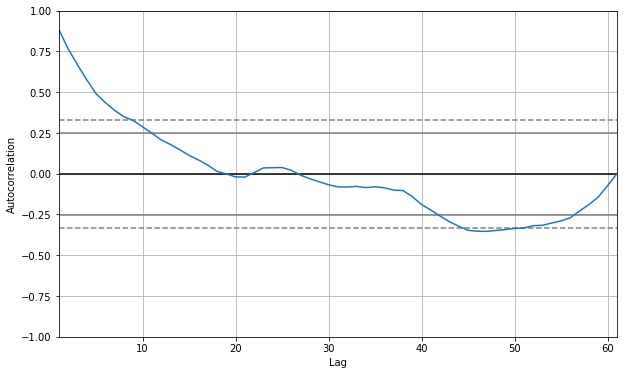

In [117]:
autocorrelation_plot(frame['INTC'])

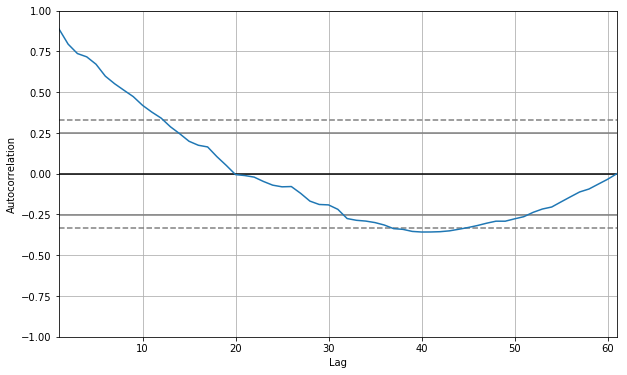

In [118]:
autocorrelation_plot(frame['EBAY'])

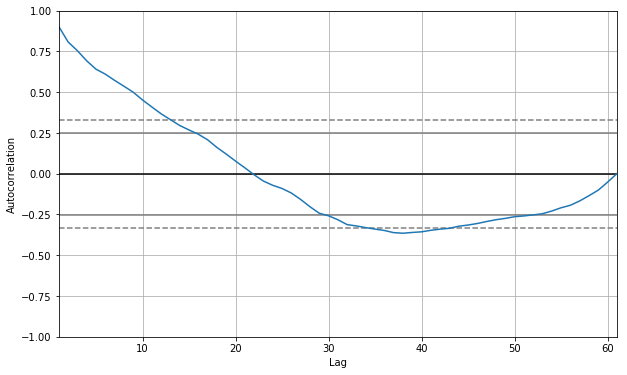

In [119]:
autocorrelation_plot(frame['AMZN'])

# They may be autocorrelated or not autocorrelated .

In [260]:
shiftframe = frame/frame.shift(1) - 1
shiftframe=shiftframe.dropna()
shiftframe=shiftframe[(shiftframe.T != 0).any()]
shiftframe.count()

AAPL    59
INTC    59
EBAY    59
AMZN    59
dtype: int64

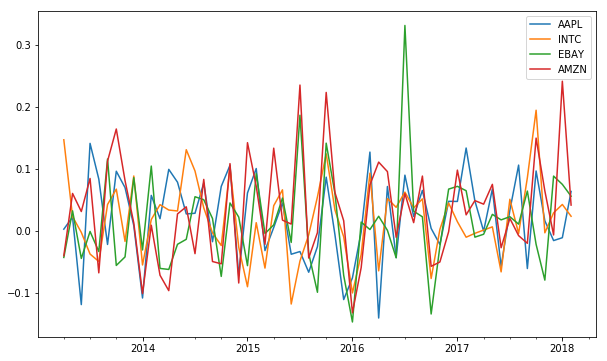

In [261]:
shiftframe.plot()

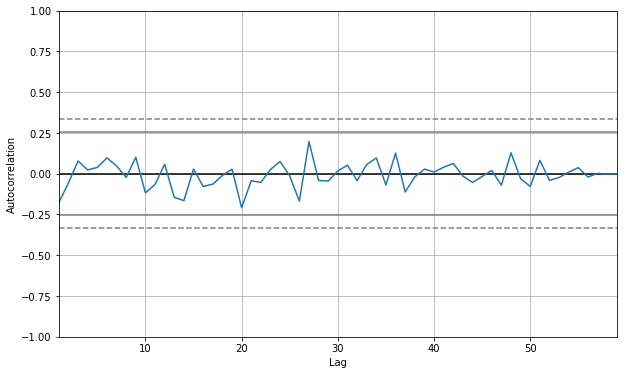

In [262]:
autocorrelation_plot(shiftframe['AAPL'])

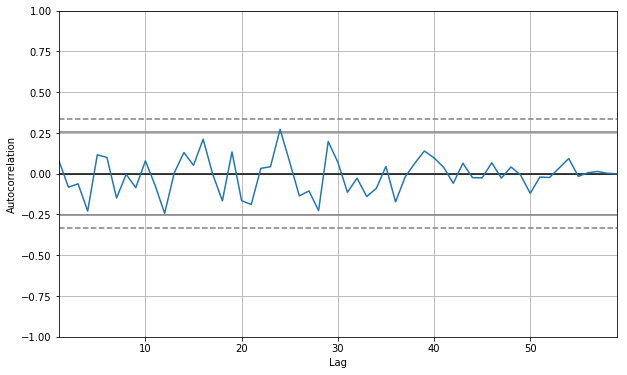

In [263]:
autocorrelation_plot(shiftframe['INTC'])

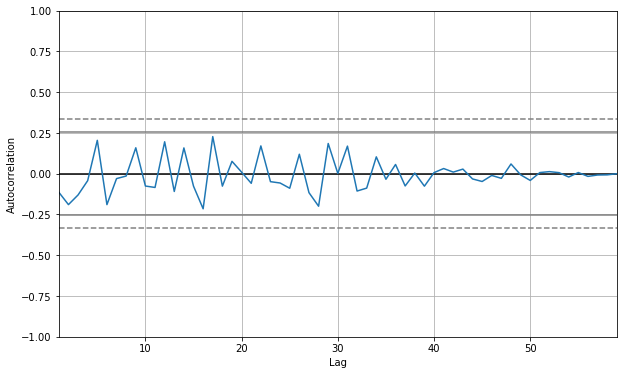

In [264]:
autocorrelation_plot(shiftframe['EBAY'])

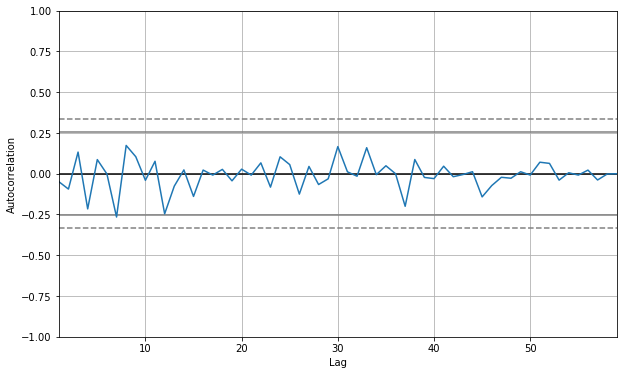

In [259]:
autocorrelation_plot(shiftframe['AMZN'])

# Answer:monthly returns are not autocorrelated because they are always between -0.25 and 0.25. And as Lag increase the Autocorrelation get closer to 0.

## OPTIONAL: Visualize the correlation between the returns of all pairs of stocks using a scatterplot matrix (1 bonus mark)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


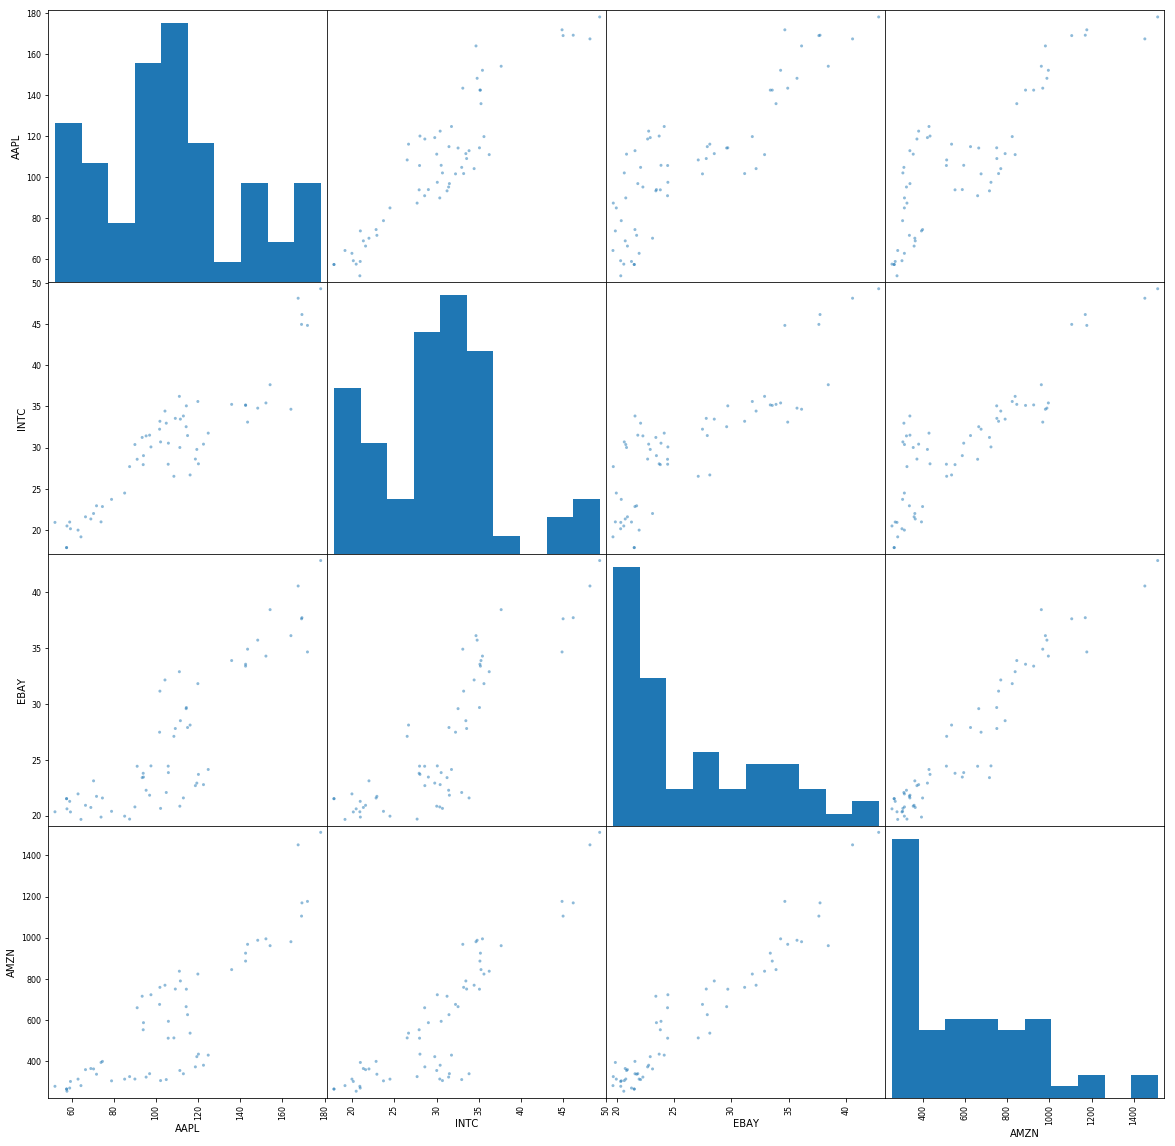

In [219]:
pd.scatter_matrix(frame, figsize=(20, 20))
plt.show()

# OPTIONAL: Following the instructions in the article The Glowing Python (Links to an external site.)Links to an external site.  visualize the correlation of the returns of all pairs of stocks (2 bonus marks)

In [147]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

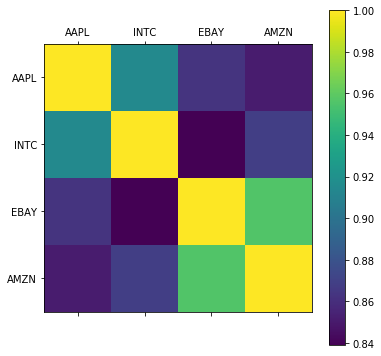

In [211]:
plt.matshow(frame.dropna().corr())
plt.xticks(range(len(frame.columns)), frame.columns)
plt.yticks(range(len(frame.columns)), frame.columns)
plt.colorbar()
plt.show()